<a href="https://colab.research.google.com/github/hf2450/Text_Analysis_Final_Project/blob/main/final_project_hf2450_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensuring Effective Supervision of Taxpayers by Analyzing and Profiling Using External Sources.**

## **Introduction**

Tax avoidance and tax evasion are both problematic issues for taxation in Indonesia. The country is estimated to lose approximately $6.48 billion in unpaid taxes annually due to these problems. Moreover, Indonesia, a middle-income nation, is placed 11th out of 30 countries when it comes to the extent of tax avoidance. This ranking is based on data from the International Center for Policy and Research (ICPR) and the International Center for Taxation and Development (ICTD) ([Cobham, 2018](https://https://doi.org/10.1002/jid.3348)).

Taxes are indeed crucial for Indonesia, and the issue of tax avoidance needs immediate attention. According to data, Indonesia's state revenue is planned to amount to `$`176.77 billion, consisting of tax revenue of `$`146.68 billion, non-tax state revenue of `$`30.62 billion, and grants of `$`25.42 million ([setkab.go.id, 2023](https://https://setkab.go.id/en/address-of-the-president-of-the-republic-of-indonesia-on-the-presentation-of-the-government-statement-on-the-bill-on-the-state-budget-for-the-2024-fiscal-year-and-its-financial-note-before-the-plena/)). This means that tax revenue accounts for around 82.98% of the Indonesian state budget's main source (`$`146.68 / `$`176.77) x 100%). Failure to achieve this revenue could potentially lead to a crisis fueled by increased debt.

Intense supervision from revenue agents at the Directorate General Taxes of the Republic of Indonesia is needed to prevent tax avoidance and tax evasion. However, this is more challenging than turning the palm of your hand because the proportion of revenue agents and taxpayers is quite different. One revenue agent must supervise around 422 taxpayers, whereas, in one year, there are only 365 days (Based on general knowledge, total taxpayers in Indonesia are around 19 million, and revenue agents are approximately 45,000. Thus, 422 = 19 million/45,000). Therefore, there must be several taxpayers who need to be better supervised. Automating the process of searching for taxpayers in cyberspace would be extremely helpful in streamlining the analysis and supervision of taxpayers. It can be quite a daunting task for revenue agents to sift through all the information available on cyberspace or financial news, one by one, to find what they need. An automated system would certainly make the process much more efficient and effective.

This research project aims to construct a taxpayer profile utilizing an Application Programming Interface (API) to collect data from financial news articles and Named Entity Recognition (NER) as a text analysis method. The development of an NER is expected to efficiently parse out names of entities, which in this project are specific taxpayers, throughout financial news, along with various tax-related conditions that could be delved deeper. This project would take some taxpayers in the US as an example to build the model, such as VF Corp., an apparel industry, and Palo Alto Networks, Inc., a computer and other electronic products industry. Both companies represent micro, small, and medium enterprises (MSME); in Indonesia, most MSMEs have low tax compliance. In addition, both industries are also industries that continue to develop and can be compared to each other.

Confidently, the project might provide a rigorous response to these two questions. 1) Is it necessary to conduct a detailed analysis of the tax potential for VF Corp., and Palo Alto Networks, Inc., and 2) which industries are currently experiencing growth and are best suited for a tax potential exploration? The hypothesis posits that a thorough analysis of the tax potential of VF Corp., and Palo Alto Networks, Inc., would yield valuable insights into potential tax revenue. Additionally, it anticipates that specific industries currently experiencing growth will offer favorable opportunities for further tax exploration. Eventually, this project will enable the precise direction of tax potential exploration policies toward more advanced industry sectors, measured by the more tax-related conditions that appear along with taxpayers' names in the text analysis.

## **Methods**

### **Text Collection**

The project employs a combination of News API and web scraping tools for data collection, with News API serving as the primary tool due to restrictions on web scraping for many online news articles. API, or Application Programming Interface, in this context, pertains to data APIs—interfaces crafted to facilitate data sharing and management, exemplified by the News API. These APIs function as software entities, varying in size from extensive systems to more streamlined structures. They act as intermediaries, connecting databases with users seeking access to the data ([Adam, 2019](https://medium.com/epfl-extension-school/an-illustrated-introduction-to-apis-10f8000313b9)). In contrast, web scraping involves directly extracting information from the internet. While manually copying and pasting data from a website represents a rudimentary form of web scraping, the term typically implies the use of automated tools and processes for data extraction ([Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)).

When using News API, the initial step involves installing and importing the requests library from Python to facilitate data requests from URLs  ([Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)). Installing News API before initiating communication within the Python environment is crucial. To gain access to the News API library, individuals need to register on the News API website to obtain a token or key. Once acquired, this key allows the importation of several articles on the News API, and we can continue to import several important libraries. For instance, BeatifulSoup for the purpose of refining and interpreting HTML text data, utilizing Pandas for visualizing and manipulating tabular data, JSON (JavaScript Object Notation) for encoding data structures to ensure machine readability, Glob for establishing connections to directories in your operating system, Word Cloud for generating visual representations of word frequencies, and Matplotlib for visualizing the Word Clouds ([Krisel, 2023](https://github.com/rskrisel/web_scraping_workshop)). The last and also essential library that needs to be imported is pprint or Pretty Print, a utility module employed for displaying data structures in an organized and easily understandable manner ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)).

In [ ]:
pip install requests

In [ ]:
import requests
import json
import pandas as pd

In [ ]:
!pip install newsapi-python

In [ ]:
import pprint

In [ ]:
secret= 'a552a6f4f4b84a04a55eed90dd3f92f4'

The data collection process can be initiated following the installation and importation of all essential libraries. Crucial to this is the setup of the endpoint and specification of the query in the News API data collection. ``The News API offers three endpoints: `/v2/top-headlines,` which fetches the most significant headlines categorized by country and topic; `/v2/everything,` which retrieves news articles from a vast array of over 30,000 sources; and `/v2/sources,` providing details about different news sources`` ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)). ``In this project, the second endpoint, `/v2/everything`, is the designated endpoint``.

In [ ]:
url = 'https://newsapi.org/v2/everything?'

Moreover, the subsequent step involves defining parameters. As this project aims to compare two entities for analysis, two parameters are established. One parameter employs "Palo Alto Networks" as the query phrase, while the other utilizes "VF Corp." The project specifies a page size of 100, the maximum number allowed, and English as the language in the article ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)). After configuring the parameters, the request is initiated, and the result is converted into JSON format, printed using the pretty print command. To gain a glimpse of the current condition of both entities, a strategic approach involves converting and printing the titles of the articles. Additionally, the utilization of Word Cloud visualization can provide valuable insights. Given that the result type is in dictionary format, it can be effortlessly converted into a Pandas DataFrame.

In [ ]:
parameters1 = {
    'q': 'Palo Alto Networks', # query phrase
    #'sources': 'new york times', #specify sources, if desired
    'pageSize': 100,  # maximum is 100
    'language': 'en',
    'apiKey': secret # your own API key
    }

In [ ]:
parameters2 = {
    'q': 'VF Corp',
    'pageSize': 100,
    'language': 'en',
    'apiKey': secret  # your own API key
}

In [ ]:
response1 = requests.get(url, params=parameters1)
response_json1 = response1.json()
pprint.pprint(response_json1)

In [ ]:
response2 = requests.get(url, params=parameters2)
response_json2 = response2.json()
pprint.pprint(response_json2)

In [ ]:
for i in response_json1['articles']:
    print(i['title'])

for i in response_json2['articles']:
    print(i['title'])

Palo Alto Networks Acquires Israel’s Talon Cyber for $625M
The Ratings Game: Palo Alto Networks’ stock is falling after trimmed billings outlook. Analysts say to look past the ‘noise.’
North Korea makes finding a gig even harder by attacking candidates and employers
Chinese Hackers Launch Covert Espionage Attacks on 24 Cambodian Organizations
Mustang Panda Hackers Targets Philippines Government Amid South China Sea Tensions
Palo Alto Networks Strata Cloud Manager proactively prevents network disruptions
CISA Adds Three Security Flaws with Active Exploitation to KEV Catalog
Novel backdoor persists even after critical Confluence vulnerability is patched
Resecurity integrates with Palo Alto Networks Cortex XSOAR Marketplace
Palo Alto Networks to acquire Talon Cyber Security
Palo Alto Networks adds BYOML framework to Cortex XSIAM 2.0
Palo Alto Networks to Acquire Cloud Security Start-Up Dig Security
Futures: These Two Tech Giants Dive; AI News Hits Nvidia
What Ilya Sutskever Wants
Palo Alt

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text_combined1 = ''

In [ ]:
for i in response_json1['articles']:
    text_combined1 += i['title'] + ' '

print(text_combined1[:300])

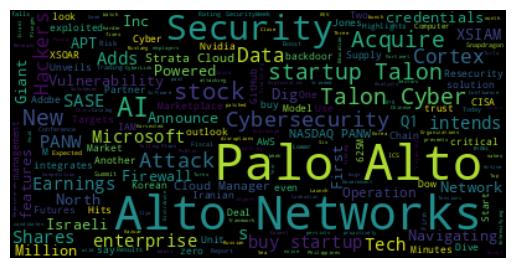

In [ ]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text_combined2 = ''

In [ ]:
for i in response_json2['articles']:
    text_combined2 += i['title'] + ' '

print(text_combined2[:300])

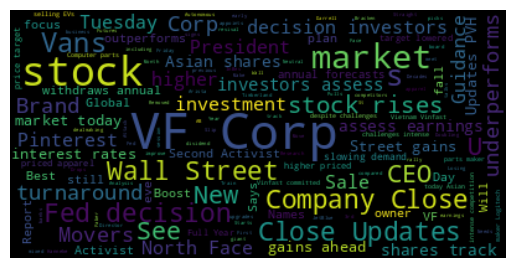

In [ ]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df1 = pd.DataFrame(response_json1['articles'])

# Create a DataFrame from response_json2
df2 = pd.DataFrame(response_json2['articles'])

# You now have two separate DataFrames, df1 and df2, with the article data

# To combine them into a single DataFrame, you can use the pandas.concat function
combined_df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df1

In [ ]:
df2

In [ ]:
combined_df

Data clearing holds significant importance in this project due to the inconsistent nature of the data retrieved from the News API ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)). In this phase, a new function is introduced to refine the "source" column, with the objective of preserving only the publication names, ensuring a cleaner and more focused representation. Leveraging the duplicated function, two sets of data are eliminated. Finally, as the News API provides only partial contents of the articles, the next step involves utilizing web scraping as a tool to retrieve the complete contents.

In [ ]:
def dict_to_value(dict):
    for value in dict:
        resultList = list(dict.values())
        resultList.reverse()
        return str(resultList[0])

In [ ]:
combined_df['source'] = combined_df['source'].apply(dict_to_value)
combined_df

In [ ]:
combined_df.dtypes

In [ ]:
combined_df[combined_df.duplicated(keep=False)]

,source,author,title,description,url,urlToImage,publishedAt,content
114,[Removed],None,[Removed],[Removed],https://removed.com,None,1970-01-01T00:00:00Z,[Removed]
170,[Removed],None,[Removed],[Removed],https://removed.com,None,1970-01-01T00:00:00Z,[Removed]


After defining a new function to scrape an article from the URL, a for loop is constructed in the forthcoming steps. This for loop purpose is to systematically extract text from each URL. As the content stored in our "text" column is in HTML format, posing a challenge for interpretation, BeautifulSoup is employed. The get_text ( ) function is applied, and the refined results are visualized using the print function. Ultimately, we incrementally built a for loop to automate the saving of extracted data as text files ([Krisel, 2023](https://gist.github.com/rskrisel/4ff9629df9f9d6bf5a638b8ba6c13a68)). At this juncture, 130 text files have been successfully stored in the database under the collection "text," with articles 1 to 59 associated with Palo Alto Networks and articles 60 to 130 linked to VF Corp. This number shrank from the number of articles from News API because some articles are forbidden to access through web scraping.

In [ ]:
def scrape_article(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any HTTP request errors
        response.encoding = 'utf-8'
        html_string = response.text
        return html_string
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while scraping the URL: {e}")
        return None

In [ ]:
sample_urls = combined_df
sample_urls

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
sample_urls['text'] = sample_urls['url'].apply(scrape_article)

An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.theregister.com/2023/11/23/north_korea_attacks_job_market/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.theregister.com/2023/11/14/novel_backdoor_persists_confluence/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.securityweek.com/palo-alto-networks-to-acquire-cloud-security-start-up-dig-security/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.securityweek.com/palo-alto-to-acquire-talon-intensifying-competition-in-cloud-data-security/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.investors.com/news/technology/earnings-reports-kick-in-cybersecurity-stocks/
An error occurred while scraping the URL: 403 Client Error: Forbidden for url: https://www.theregister.com/2023/11/15/november_2023_patch_tuesday/
An error occurred whi

In [ ]:
sample_urls

In [ ]:
sample_urls = sample_urls[sample_urls['text'].notna()]
sample_urls.reset_index(drop=True, inplace=True)
sample_urls #we can see that first file until 59 is Palo Alto Networks

,source,author,title,description,url,urlToImage,publishedAt,content,text
0,ReadWrite,Radek Zielinski,Palo Alto Networks Acquires Israel’s Talon Cyb...,Palo Alto Networks has acquired Israel-based c...,https://readwrite.com/palo-alto-networks-acqui...,https://readwrite.com/wp-content/uploads/2023/...,2023-11-06T20:00:59Z,Palo Alto Networks has acquired Israel-based c...,"<!DOCTYPE html>\n<html lang=""en-US"" class=""no-..."
1,MarketWatch,Bill Peters,The Ratings Game: Palo Alto Networks’ stock is...,Many analysts point to strong cybersecurity de...,https://www.marketwatch.com/story/palo-alto-ne...,https://mw3.wsj.net/mw5/content/logos/mw_logo_...,2023-11-16T18:41:00Z,"But despite a downgrade from one analyst, many...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
2,Internet,info@thehackernews.com (The Hacker News),Chinese Hackers Launch Covert Espionage Attack...,Cybersecurity researchers have discovered what...,https://thehackernews.com/2023/11/chinese-hack...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-13T05:58:00Z,Cybersecurity researchers have discovered what...,<!DOCTYPE html>\n<html dir='ltr' lang='en'>\n<...
3,Internet,info@thehackernews.com (The Hacker News),Mustang Panda Hackers Targets Philippines Gove...,The China-linked Mustang Panda actor has been ...,https://thehackernews.com/2023/11/mustang-pand...,https://blogger.googleusercontent.com/img/b/R2...,2023-11-21T06:58:00Z,The China-linked Mustang Panda actor has been ...,<!DOCTYPE html>\n<html dir='ltr' lang='en'>\n<...
4,Forbes,"Steve McDowell, Contributor, \n Steve McDowell...",Palo Alto Networks Prisma Cloud Revolutionizes...,Its Code-to-Cloud approach dives deep into pat...,https://www.forbes.com/sites/stevemcdowell/202...,https://imageio.forbes.com/specials-images/ima...,2023-10-23T20:43:12Z,Palo Alto Networks\r\nSOPA Images/LightRocket ...,"<!DOCTYPE html><html lang=""en""><head><link rel..."
...,...,...,...,...,...,...,...,...,...
125,MarketWatch,Steve Gelsi,: VF Corp.’s stock rises after J.P. Morgan upg...,"VF Corp. VFC, the maker of Vans sneakers and N...",https://www.marketwatch.com/story/vf-corp-s-st...,https://s.wsj.net/public/resources/MWimages/MW...,2023-11-15T12:32:00Z,"VF Corp. \r\n VFC,\r\n +10.04%\r\n,\r\n the ma...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
126,MarketWatch,MarketWatch Automation,Company Close Updates: PVH Corp. stock underpe...,Shares of PVH Corp. rallied 6.74% to $81.35 Tu...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-14T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +6.74%\r\nra...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
127,MarketWatch,MarketWatch Automation,Company Close Updates: Ralph Lauren Corp. Cl A...,Shares of Ralph Lauren Corp. Cl A dropped 0.22...,https://www.marketwatch.com/data-news/ralph-la...,https://images.mktw.net/im-220105/social,2023-11-13T22:23:00Z,"Shares of Ralph Lauren Corp. Cl A \r\n RL,\r\n...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."
128,MarketWatch,MarketWatch Automation,Company Close Updates: PVH Corp. stock outperf...,Shares of PVH Corp. inched 0.82% higher to $77...,https://www.marketwatch.com/data-news/pvh-corp...,https://images.mktw.net/im-220105/social,2023-11-08T22:34:00Z,"Shares of PVH Corp. \r\n PVH,\r\n +0.82%\r\nin...","<!DOCTYPE html>\n<html\n lang=""en-US""\n data..."


In [ ]:
for text in sample_urls['text']:
  soup = BeautifulSoup(text)
  article = soup.get_text()
  print(article)

In [ ]:
import os

id = 0
output_dir = "//content/drive/MyDrive/final_project/Files"  # Define the output directory

for text in sample_urls['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()

    id += 1
    output_file_path = os.path.join(output_dir, f"article_{id}.txt")

    # Check if the file already exists, and if not, save the article
    if not os.path.exists(output_file_path):
        with open(output_file_path, "w") as file:
            file.write(str(article))
    else:
        print(f"Article {id} already exists and was not overwritten")

### **Data Analysis**

This project employs Named Entity Recognition (NER) to analyze the data. NER stands as a foundational task within the realm of natural language processing (NLP). NLP, an interdisciplinary domain at the crossroads of linguistics, statistics, and computer science, navigates the intricacies of language understanding and manipulation. In the context of NER, the objective is to identify and categorize entities within a given text, such as names of people, organizations, locations, money, and more. This pivotal task in NLP plays a crucial role in various applications, contributing to advancements in information extraction, text analysis, and broader artificial intelligence endeavors. ([Krisel, 2023](https://github.com/rskrisel/NER_workshop/blob/main/NER_workshop.ipynb)). The first stage of applying NER involves installing and importing the spaCy library in Python, followed by loading the spaCy language model.


In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm
pd.options.display.max_rows = 600
pd.options.display.max_colwidth = 400
import glob
from pathlib import Path

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
directory = "/content/drive/MyDrive/final_project/Files"
articles = glob.glob(f"{directory}/*.txt")

In [ ]:
articles

['/content/drive/MyDrive/final_project/Files/article_1.txt',
 '/content/drive/MyDrive/final_project/Files/article_2.txt',
 '/content/drive/MyDrive/final_project/Files/article_3.txt',
 '/content/drive/MyDrive/final_project/Files/article_4.txt',
 '/content/drive/MyDrive/final_project/Files/article_5.txt',
 '/content/drive/MyDrive/final_project/Files/article_6.txt',
 '/content/drive/MyDrive/final_project/Files/article_7.txt',
 '/content/drive/MyDrive/final_project/Files/article_8.txt',
 '/content/drive/MyDrive/final_project/Files/article_9.txt',
 '/content/drive/MyDrive/final_project/Files/article_10.txt',
 '/content/drive/MyDrive/final_project/Files/article_11.txt',
 '/content/drive/MyDrive/final_project/Files/article_12.txt',
 '/content/drive/MyDrive/final_project/Files/article_13.txt',
 '/content/drive/MyDrive/final_project/Files/article_14.txt',
 '/content/drive/MyDrive/final_project/Files/article_15.txt',
 '/content/drive/MyDrive/final_project/Files/article_16.txt',
 '/content/drive/

Before applying NER to the entire text collection, we test it on a single text to ensure its perfect functionality. Subsequent to enforcing spaCy into the text, we use the displacy library to visualize the results. The command ‘doc.ents’ outlines a list of the identified entities. Following this, we label the identified entities and filter the labels using the type of label available in the Named Entities chart for the English-language spaCy ([Data Formats, 2023](https://spacy.io/api/data-formats#named-entities)). To enhance comprehension, we present these entities in a well-organized Pandas DataFrame sorted by file names. Additionally, we expand the DataFrame by transforming it so that each row corresponds to a single entity value linked to the respective file name.

In [ ]:
filepath = f"{directory}/article_2.txt"
text = open(filepath, encoding='utf-8').read()
doc = nlp(text)

In [ ]:
displacy.render(doc, jupyter=True, style="ent")

In [ ]:
doc.ents

In [ ]:
for named_entity in doc.ents:
    print(named_entity, named_entity.label_)

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "PERSON":
        print(named_entity)

In [ ]:
for named_entity in doc.ents:
    if named_entity.label_ == "ORG":
        print(named_entity)

In [ ]:
entities=[]
entity_type = []
entity_identified = []
for named_entity in doc.ents:
    entity_type.append(named_entity.label_)
    entity_identified.append(named_entity.text)
    entity_dict = {'Entity_type': entity_type, 'Entity_identified': entity_identified}
    entities.append(entity_dict)
print(entities)

In [ ]:
df_NER = pd.DataFrame(entities)

In [ ]:
all_entities = []
for filepath in articles:
    text = open(filepath, encoding='utf-8').read()
    doc = nlp(text)
    entity_type = []
    for ent in doc.ents:
        entity_type.append(ent.label_)
    entity_identified = []
    for ent in doc.ents:
        entity_identified.append(ent.text)
    ent_dict = {'File_name': filepath, 'Entity_type': entity_type, 'Entity_identified': entity_identified}
    all_entities.append(ent_dict)
print(all_entities)

[{'File_name': '/content/drive/MyDrive/final_project/Files/article_1.txt', 'Entity_type': ['ORG', 'GPE', 'ORG', 'MONEY', 'ORG', 'ORG', 'ORG', 'GPE', 'ORG', 'MONEY', 'PERSON', 'DATE', 'DATE', 'ORG', 'GPE', 'ORG', 'MONEY', 'DATE', 'GPE', 'ORDINAL', 'GPE', 'DATE', 'DATE', 'GPE', 'GPE', 'ORG', 'MONEY', 'ORG', 'DATE', 'PERSON', 'ORG', 'MONEY', 'GPE', 'ORG', 'ORG', 'ORG', 'ORG', 'GPE', 'GPE', 'GPE', 'GPE', 'DATE', 'PERCENT', 'GPE', 'GPE', 'GPE', 'PERSON', 'ORG', 'GPE', 'ORG', 'CARDINAL', 'PERSON', 'ORG', 'ORG', 'GPE', 'ORG', 'GPE', 'WORK_OF_ART', 'GPE', 'ORG', 'ORG', 'DATE', 'ORG', 'ORG', 'PERSON', 'PERSON', 'ORG', 'NORP', 'ORG', 'ORG', 'ORG', 'PERSON', 'WORK_OF_ART', 'PERSON', 'ORG', 'PRODUCT'], 'Entity_identified': ['Palo Alto Networks Acquires', 'Israel', 'Talon Cyber', '625', 'AI', 'More\n \n\n\n\n\nSearch', 'Palo Alto Networks Acquires', 'Israel', 'Talon Cyber', '625', 'Radek Zielinski', 'Nov 6,', '2023', 'Palo Alto Networks', 'Israel', 'Talon Cyber Security', '$625 million', 'Monday', 

In [ ]:
df_NER = pd.DataFrame(all_entities)
df_NER = df_NER.sort_values(by='File_name', ascending=True)
df_NER

In [ ]:
df_NER = df_NER.set_index(['File_name'])
df_NER = df_NER.apply(pd.Series.explode).reset_index()
df_NER

,File_name,Entity_type,Entity_identified
0,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks Acquires
1,/content/drive/MyDrive/final_project/Files/article_1.txt,GPE,Israel
2,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Talon Cyber
3,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
4,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,AI
...,...,...,...
35469,/content/drive/MyDrive/final_project/Files/article_99.txt,ORG,Fairchild Publishing
35470,/content/drive/MyDrive/final_project/Files/article_99.txt,ORG,LLC
35471,/content/drive/MyDrive/final_project/Files/article_99.txt,DATE,2021
35472,/content/drive/MyDrive/final_project/Files/article_99.txt,ORG,Penske Media Corporation


In addressing the two hypotheses, we conducted a straightforward analysis by filtering the DataFrame based on organization and money labels, specifically ORG and MONEY. Entities that appeared more frequently in the DataFrame are deemed worthy of further analysis. A higher occurrence of names and monetary values associated with an entity may indicate its growth. Unlike Palo Alto Networks, which lacks another brand name, we filtered VF Corp by including some of its brands, such as Timberland, Vans, The North Face, Supreme, JanSport, and others. This decision was made because certain articles mentioned these brands while describing VF Corp. Additionally, in analyzing the money label, we applied a filter in the file name column, which articles 1 to 59 concerning Palo Alto Networks and the remaining articles for VF Corp.

In [ ]:
df_NER[(df_NER['Entity_type'] == 'ORG') & (df_NER['Entity_identified'].isin(['Palo Alto Networks', 'Palo Alto Network', 'Palo Alto']))]

,File_name,Entity_type,Entity_identified
13,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks
52,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks
76,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
85,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
96,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
99,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
121,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
146,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
2884,/content/drive/MyDrive/final_project/Files/article_11.txt,ORG,Palo Alto Networks
6389,/content/drive/MyDrive/final_project/Files/article_13.txt,ORG,Palo Alto Networks


In [ ]:
df_NER[(df_NER['Entity_type'] == 'ORG') & (df_NER['Entity_identified'] == 'Palo Alto Networks')] #result is same as above

,File_name,Entity_type,Entity_identified
13,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks
52,/content/drive/MyDrive/final_project/Files/article_1.txt,ORG,Palo Alto Networks
76,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
85,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
96,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
99,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
121,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
146,/content/drive/MyDrive/final_project/Files/article_10.txt,ORG,Palo Alto Networks
2884,/content/drive/MyDrive/final_project/Files/article_11.txt,ORG,Palo Alto Networks
6389,/content/drive/MyDrive/final_project/Files/article_13.txt,ORG,Palo Alto Networks


In [ ]:
df_NER[(df_NER['Entity_type'] == 'ORG') & (df_NER['Entity_identified'].isin(['VF Corp.', 'VF Corp','VF Corporation', 'Napapijri', 'JanSport', 'Vans', 'Timberland', 'The North Face', 'Supreme', 'Dickies']))]

,File_name,Entity_type,Entity_identified
541,/content/drive/MyDrive/final_project/Files/article_100.txt,ORG,VF Corp
893,/content/drive/MyDrive/final_project/Files/article_101.txt,ORG,VF Corp
980,/content/drive/MyDrive/final_project/Files/article_102.txt,ORG,Vans
981,/content/drive/MyDrive/final_project/Files/article_102.txt,ORG,VF Corp.
1249,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,The North Face
1285,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,VF Corp.
1287,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,The North Face
1289,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,Supreme
1346,/content/drive/MyDrive/final_project/Files/article_103.txt,ORG,VF Corp.
1512,/content/drive/MyDrive/final_project/Files/article_104.txt,ORG,The North Face


In [ ]:
df_NER[df_NER['Entity_type'] == 'MONEY']

,File_name,Entity_type,Entity_identified
3,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
9,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
16,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,$625 million
26,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,around $400 million
31,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,about $143 million
...,...,...,...
35332,/content/drive/MyDrive/final_project/Files/article_99.txt,MONEY,$5.8 billion
35350,/content/drive/MyDrive/final_project/Files/article_99.txt,MONEY,4.50
35351,/content/drive/MyDrive/final_project/Files/article_99.txt,MONEY,$4.55 to $
35352,/content/drive/MyDrive/final_project/Files/article_99.txt,MONEY,4.75


In [ ]:
article_file_paloalto = [
    '/content/drive/MyDrive/final_project/Files/article_1.txt',
    '/content/drive/MyDrive/final_project/Files/article_2.txt',
    '/content/drive/MyDrive/final_project/Files/article_3.txt',
    '/content/drive/MyDrive/final_project/Files/article_4.txt',
    '/content/drive/MyDrive/final_project/Files/article_5.txt',
    '/content/drive/MyDrive/final_project/Files/article_6.txt',
    '/content/drive/MyDrive/final_project/Files/article_7.txt',
    '/content/drive/MyDrive/final_project/Files/article_8.txt',
    '/content/drive/MyDrive/final_project/Files/article_9.txt',
    '/content/drive/MyDrive/final_project/Files/article_10.txt',
    '/content/drive/MyDrive/final_project/Files/article_11.txt',
    '/content/drive/MyDrive/final_project/Files/article_12.txt',
    '/content/drive/MyDrive/final_project/Files/article_13.txt',
    '/content/drive/MyDrive/final_project/Files/article_14.txt',
    '/content/drive/MyDrive/final_project/Files/article_15.txt',
    '/content/drive/MyDrive/final_project/Files/article_16.txt',
    '/content/drive/MyDrive/final_project/Files/article_17.txt',
    '/content/drive/MyDrive/final_project/Files/article_18.txt',
    '/content/drive/MyDrive/final_project/Files/article_19.txt',
    '/content/drive/MyDrive/final_project/Files/article_20.txt',
    '/content/drive/MyDrive/final_project/Files/article_21.txt',
    '/content/drive/MyDrive/final_project/Files/article_22.txt',
    '/content/drive/MyDrive/final_project/Files/article_23.txt',
    '/content/drive/MyDrive/final_project/Files/article_24.txt',
    '/content/drive/MyDrive/final_project/Files/article_25.txt',
    '/content/drive/MyDrive/final_project/Files/article_26.txt',
    '/content/drive/MyDrive/final_project/Files/article_27.txt',
    '/content/drive/MyDrive/final_project/Files/article_28.txt',
    '/content/drive/MyDrive/final_project/Files/article_29.txt',
    '/content/drive/MyDrive/final_project/Files/article_30.txt',
    '/content/drive/MyDrive/final_project/Files/article_31.txt',
    '/content/drive/MyDrive/final_project/Files/article_32.txt',
    '/content/drive/MyDrive/final_project/Files/article_33.txt',
    '/content/drive/MyDrive/final_project/Files/article_34.txt',
    '/content/drive/MyDrive/final_project/Files/article_35.txt',
    '/content/drive/MyDrive/final_project/Files/article_36.txt',
    '/content/drive/MyDrive/final_project/Files/article_37.txt',
    '/content/drive/MyDrive/final_project/Files/article_38.txt',
    '/content/drive/MyDrive/final_project/Files/article_39.txt',
    '/content/drive/MyDrive/final_project/Files/article_40.txt',
    '/content/drive/MyDrive/final_project/Files/article_41.txt',
    '/content/drive/MyDrive/final_project/Files/article_42.txt',
    '/content/drive/MyDrive/final_project/Files/article_43.txt',
    '/content/drive/MyDrive/final_project/Files/article_44.txt',
    '/content/drive/MyDrive/final_project/Files/article_45.txt',
    '/content/drive/MyDrive/final_project/Files/article_46.txt',
    '/content/drive/MyDrive/final_project/Files/article_47.txt',
    '/content/drive/MyDrive/final_project/Files/article_48.txt',
    '/content/drive/MyDrive/final_project/Files/article_49.txt',
    '/content/drive/MyDrive/final_project/Files/article_50.txt',
    '/content/drive/MyDrive/final_project/Files/article_51.txt',
    '/content/drive/MyDrive/final_project/Files/article_52.txt',
    '/content/drive/MyDrive/final_project/Files/article_53.txt',
    '/content/drive/MyDrive/final_project/Files/article_54.txt',
    '/content/drive/MyDrive/final_project/Files/article_55.txt',
    '/content/drive/MyDrive/final_project/Files/article_56.txt',
    '/content/drive/MyDrive/final_project/Files/article_57.txt',
    '/content/drive/MyDrive/final_project/Files/article_58.txt',
    '/content/drive/MyDrive/final_project/Files/article_59.txt',
]

df_NER[(df_NER['File_name'].isin(article_file_paloalto)) & (df_NER['Entity_type'] == 'MONEY') & (df_NER['Entity_identified'])]

,File_name,Entity_type,Entity_identified
3,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
9,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
16,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,$625 million
26,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,around $400 million
31,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,about $143 million
6503,/content/drive/MyDrive/final_project/Files/article_13.txt,MONEY,2023 Reed Exhibitions Ltd.
6599,/content/drive/MyDrive/final_project/Files/article_14.txt,MONEY,$600 Million-Plus
6603,/content/drive/MyDrive/final_project/Files/article_14.txt,MONEY,$600 Million-Plus
6617,/content/drive/MyDrive/final_project/Files/article_14.txt,MONEY,$600 million to $700 million
6686,/content/drive/MyDrive/final_project/Files/article_14.txt,MONEY,$2 Billion


In [ ]:
article_file_vfcorp = [
    '/content/drive/MyDrive/final_project/Files/article_60.txt',
    '/content/drive/MyDrive/final_project/Files/article_61.txt',
    '/content/drive/MyDrive/final_project/Files/article_62.txt',
    '/content/drive/MyDrive/final_project/Files/article_63.txt',
    '/content/drive/MyDrive/final_project/Files/article_64.txt',
    '/content/drive/MyDrive/final_project/Files/article_65.txt',
    '/content/drive/MyDrive/final_project/Files/article_66.txt',
    '/content/drive/MyDrive/final_project/Files/article_67.txt',
    '/content/drive/MyDrive/final_project/Files/article_68.txt',
    '/content/drive/MyDrive/final_project/Files/article_69.txt',
    '/content/drive/MyDrive/final_project/Files/article_70.txt',
    '/content/drive/MyDrive/final_project/Files/article_71.txt',
    '/content/drive/MyDrive/final_project/Files/article_72.txt',
    '/content/drive/MyDrive/final_project/Files/article_73.txt',
    '/content/drive/MyDrive/final_project/Files/article_74.txt',
    '/content/drive/MyDrive/final_project/Files/article_75.txt',
    '/content/drive/MyDrive/final_project/Files/article_76.txt',
    '/content/drive/MyDrive/final_project/Files/article_77.txt',
    '/content/drive/MyDrive/final_project/Files/article_78.txt',
    '/content/drive/MyDrive/final_project/Files/article_79.txt',
    '/content/drive/MyDrive/final_project/Files/article_80.txt',
    '/content/drive/MyDrive/final_project/Files/article_81.txt',
    '/content/drive/MyDrive/final_project/Files/article_82.txt',
    '/content/drive/MyDrive/final_project/Files/article_83.txt',
    '/content/drive/MyDrive/final_project/Files/article_84.txt',
    '/content/drive/MyDrive/final_project/Files/article_85.txt',
    '/content/drive/MyDrive/final_project/Files/article_86.txt',
    '/content/drive/MyDrive/final_project/Files/article_87.txt',
    '/content/drive/MyDrive/final_project/Files/article_88.txt',
    '/content/drive/MyDrive/final_project/Files/article_89.txt',
    '/content/drive/MyDrive/final_project/Files/article_90.txt',
    '/content/drive/MyDrive/final_project/Files/article_91.txt',
    '/content/drive/MyDrive/final_project/Files/article_92.txt',
    '/content/drive/MyDrive/final_project/Files/article_93.txt',
    '/content/drive/MyDrive/final_project/Files/article_94.txt',
    '/content/drive/MyDrive/final_project/Files/article_95.txt',
    '/content/drive/MyDrive/final_project/Files/article_96.txt',
    '/content/drive/MyDrive/final_project/Files/article_97.txt',
    '/content/drive/MyDrive/final_project/Files/article_98.txt',
    '/content/drive/MyDrive/final_project/Files/article_99.txt',
    '/content/drive/MyDrive/final_project/Files/article_100.txt',
    '/content/drive/MyDrive/final_project/Files/article_101.txt',
    '/content/drive/MyDrive/final_project/Files/article_102.txt',
    '/content/drive/MyDrive/final_project/Files/article_103.txt',
    '/content/drive/MyDrive/final_project/Files/article_104.txt',
    '/content/drive/MyDrive/final_project/Files/article_105.txt',
    '/content/drive/MyDrive/final_project/Files/article_106.txt',
    '/content/drive/MyDrive/final_project/Files/article_107.txt',
    '/content/drive/MyDrive/final_project/Files/article_108.txt',
    '/content/drive/MyDrive/final_project/Files/article_109.txt',
    '/content/drive/MyDrive/final_project/Files/article_110.txt',
    '/content/drive/MyDrive/final_project/Files/article_111.txt',
    '/content/drive/MyDrive/final_project/Files/article_112.txt',
    '/content/drive/MyDrive/final_project/Files/article_113.txt',
    '/content/drive/MyDrive/final_project/Files/article_114.txt',
    '/content/drive/MyDrive/final_project/Files/article_115.txt',
    '/content/drive/MyDrive/final_project/Files/article_116.txt',
    '/content/drive/MyDrive/final_project/Files/article_117.txt',
    '/content/drive/MyDrive/final_project/Files/article_118.txt',
    '/content/drive/MyDrive/final_project/Files/article_119.txt',
    '/content/drive/MyDrive/final_project/Files/article_120.txt',
    '/content/drive/MyDrive/final_project/Files/article_121.txt',
    '/content/drive/MyDrive/final_project/Files/article_122.txt',
    '/content/drive/MyDrive/final_project/Files/article_123.txt',
    '/content/drive/MyDrive/final_project/Files/article_124.txt',
    '/content/drive/MyDrive/final_project/Files/article_125.txt',
    '/content/drive/MyDrive/final_project/Files/article_126.txt',
    '/content/drive/MyDrive/final_project/Files/article_127.txt',
    '/content/drive/MyDrive/final_project/Files/article_128.txt',
    '/content/drive/MyDrive/final_project/Files/article_129.txt',
    '/content/drive/MyDrive/final_project/Files/article_130.txt',
]


df_NER[(df_NER['File_name'].isin(article_file_vfcorp)) & (df_NER['Entity_type'] == 'MONEY') & (df_NER['Entity_identified'])]

,File_name,Entity_type,Entity_identified
536,/content/drive/MyDrive/final_project/Files/article_100.txt,MONEY,billions of dollars
900,/content/drive/MyDrive/final_project/Files/article_101.txt,MONEY,$82 million
1001,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,$4 billion
1003,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,$3.8 billion to $4 billion
1020,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,as much as
1021,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,9.33
1071,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,"10,000"
1138,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,34
1166,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,49
1186,/content/drive/MyDrive/final_project/Files/article_102.txt,MONEY,49


In [ ]:
df_NER[(df_NER['File_name'] == '/content/drive/MyDrive/final_project/Files/article_1.txt') & (df_NER['Entity_type'] == 'MONEY') & (df_NER['Entity_identified'])]

,File_name,Entity_type,Entity_identified
3,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
9,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,625
16,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,$625 million
26,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,around $400 million
31,/content/drive/MyDrive/final_project/Files/article_1.txt,MONEY,about $143 million


In [ ]:
df_NER[df_NER['Entity_type'] == 'PERSON'][:15]

In [ ]:
df_NER[(df_NER['File_name'].isin(article_file_paloalto)) & (df_NER['Entity_type'] == 'PERSON') & (df_NER['Entity_identified'])]

,File_name,Entity_type,Entity_identified
10,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Radek Zielinski
29,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Ofer Ben-Noon
46,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Lior Simon
51,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Lee Klarich
64,/content/drive/MyDrive/final_project/Files/article_1.txt,PERSON,Radek Zielinski
...,...,...,...
32757,/content/drive/MyDrive/final_project/Files/article_9.txt,PERSON,LockBit
32758,/content/drive/MyDrive/final_project/Files/article_9.txt,PERSON,Citrix Bleed
32761,/content/drive/MyDrive/final_project/Files/article_9.txt,PERSON,Defender
32772,/content/drive/MyDrive/final_project/Files/article_9.txt,PERSON,Aqua Trivy


In [ ]:
df_NER[(df_NER['File_name'].isin(article_file_vfcorp)) & (df_NER['Entity_type'] == 'PERSON') & (df_NER['Entity_identified'])]

,File_name,Entity_type,Entity_identified
181,/content/drive/MyDrive/final_project/Files/article_100.txt,PERSON,Warren Buffett
185,/content/drive/MyDrive/final_project/Files/article_100.txt,PERSON,Snap Up
193,/content/drive/MyDrive/final_project/Files/article_100.txt,PERSON,IndonesiaNederlandsBahasa MelayuPortuguês
204,/content/drive/MyDrive/final_project/Files/article_100.txt,PERSON,Stock Screener
211,/content/drive/MyDrive/final_project/Files/article_100.txt,PERSON,Marijuana Stocks
...,...,...,...
35441,/content/drive/MyDrive/final_project/Files/article_99.txt,PERSON,Mens Lifestyle
35453,/content/drive/MyDrive/final_project/Files/article_99.txt,PERSON,Fairchild Live
35456,/content/drive/MyDrive/final_project/Files/article_99.txt,PERSON,Follow Us
35457,/content/drive/MyDrive/final_project/Files/article_99.txt,PERSON,Follow WWD


In [ ]:
df_NER[df_NER['Entity_type'] == 'GPE']

In [ ]:
df_NER[df_NER['Entity_type'] == 'PRODUCT']

In [ ]:
df_NER[df_NER['Entity_type'] == 'EVENT']

,File_name,Entity_type,Entity_identified
381,/content/drive/MyDrive/final_project/Files/article_100.txt,EVENT,SRPT
1142,/content/drive/MyDrive/final_project/Files/article_102.txt,EVENT,articleYou’ve
1169,/content/drive/MyDrive/final_project/Files/article_102.txt,EVENT,articleYou’ve
1379,/content/drive/MyDrive/final_project/Files/article_103.txt,EVENT,Black Friday Game Is Such a Rarity
1660,/content/drive/MyDrive/final_project/Files/article_104.txt,EVENT,Black Friday Game Is Such a Rarity
1856,/content/drive/MyDrive/final_project/Files/article_105.txt,EVENT,Thanksgiving Day Parade
2245,/content/drive/MyDrive/final_project/Files/article_107.txt,EVENT,Winter Sports\n\n\nOpinion\n\nOpinion\nEditorials\nColumnists
2298,/content/drive/MyDrive/final_project/Files/article_107.txt,EVENT,the Great Recession
2519,/content/drive/MyDrive/final_project/Files/article_107.txt,EVENT,Thanksgiving Day 2023
2520,/content/drive/MyDrive/final_project/Files/article_107.txt,EVENT,Thanksgiving Day 2023


In [ ]:
df_NER[df_NER['Entity_type'] == 'PERCENT']

In [ ]:
df_NER[df_NER['Entity_type'] == 'QUANTITY']

## **Result**

In this project, news API successfully collected 547 articles related to Palo Alto Networks, and 97 articles associated with VF Corp. 100 articles were retrieved from each related entity. Of those 200 articles, 130 were obtained from the web scraping process. This could mean that both entities still exist and warrant further analysis.

Examining the titles of the article collection provides tax authorities with valuable insights into their taxpayers. For instance, the title "Palo Alto Networks Close to Finalizing at Least $600 Million Deal For Startup Talon" implies that the entity is entering into a new business venture, potentially creating a new source of income. This, in turn, could lead to the incurrence of deferred income tax, resulting in a reduction of taxable income for the government. Consequently, revenue agents may need to verify the accuracy of the numbers reported by Palo Alto Networks in its financial report and tax return. Revenue agents could easily construct a taxpayer profile based on the titles of the collected articles below.  This approach allows for a comprehensive understanding of the entities' activities and financial transactions, aiding in the assessment of their tax liabilities.<br>

___Output Cut___<br>
___Kevin Bailey Is Stepping Down as Vans President, Will Focus on VF Corp.’s New Strategy___<br>
___VF Corp. CEO Says Vans Will Not See a Turnaround This Year___<br>
___Tech giants drive AI investments, auto industry faces labor issues___<br>
___Computer parts maker Logitech raises full-year guidance___<br>
___Timberland President Susie Mulder Is Exiting the Brand___<br>

Based on the findings above, it is evident that Kevin Bailey is no longer serving as the President of Vans but remains employed within VF Corp. Additionally, Susie Mulder has taken on the role of President at Timberland. Crafting taxpayer profiles becomes more insightful by leveraging WordCloud visualizations. As illustrated in Figure 1, Palo Alto Networks appears to be involved in businesses related to security, cloud storage, firewalls, and possibly a new startup venture. Meanwhile, Figure 2 highlights that The North Face stands out as a prominent apparel brand within VF Corp, as indicated by its clear presence in the WordCloud. This visual representation also suggests that VF Corp is a growing company, supported by the upward trajectory of its stock, despite facing challenges such as slow demand. These observations provide valuable insights for tax authorities, enabling them to update taxpayer profiles and stay informed about the evolving roles and activities of key individuals within these entities.

![Figure 1: Palo Alto Networks WordCloud](/content/drive/MyDrive/final_project/Image/download.png "Palo Alto Networks WordCloud")<br>

![Figure 2: VF Corp. WordCloud](/content/drive/MyDrive/final_project/Image/download(1).png "VF Corp. WordCloud")<br>


|index|File\_name|Entity\_type|Entity\_identified|
|---|---|---|---|
|10|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|PERSON|Radek Zielinski|
|29|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|PERSON|Ofer Ben-Noon|
|46|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|PERSON|Lior Simon|
|51|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|PERSON|Lee Klarich|
|64|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|PERSON|Radek Zielinski|
|65|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|PERSON|Radek Zielinski|
|71|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|PERSON|Scattered Spider’s|
|73|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|PERSON|Utan Svensk|
|78|/content/drive/MyDrive/final\_project/Files/article\_10\.txt|PERSON|Cortex XSIAM|
|80|/content/drive/MyDrive/final\_project/Files/article\_10\.txt|PERSON|Newsletters|
||/Output_Cut/||||<br>

___Table 1: NER output with PERSON as the type of label___<br>

Table 1 presents a preliminary list of names that may be associated with our sample companies. While this output is not flawless, it serves as a foundational draft for revenue agents when constructing a taxpayer profile. Notably, the output focuses on articles 1 and 10, connecting these names to the profile of Palo Alto Networks.

Moreover, employing the NER tool with a filter for the organization label and entity name reveals that Palo Alto Networks dominates in frequency compared to VF Corp and its associated brands. As depicted in Table 2, Palo Alto Networks boasts a total of 217 entries, surpassing VF Corp by a margin of 62. This aligns with the data collection results, where Palo Alto Networks is mentioned more than five times as frequently as VF Corp across the articles.


|index|File\_name|Entity\_type|Entity\_identified|
|---|---|---|---|
|13|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|ORG|Palo Alto Networks|
|52|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|ORG|Palo Alto Networks|
|76|/content/drive/MyDrive/final\_project/Files/article\_10\.txt|ORG|Palo Alto Networks|
|85|/content/drive/MyDrive/final\_project/Files/article\_10\.txt|ORG|Palo Alto Networks|
|96|/content/drive/MyDrive/final\_project/Files/article\_10\.txt|ORG|Palo Alto Networks|
|99|/content/drive/MyDrive/final\_project/Files/article\_10\.txt|ORG|Palo Alto Networks|
||Output Cut with Total 217 Entries||||<br>

|index|File\_name|Entity\_type|Entity\_identified|
|---|---|---|---|
|541|/content/drive/MyDrive/final\_project/Files/article\_100\.txt|ORG|VF Corp|
|893|/content/drive/MyDrive/final\_project/Files/article\_101\.txt|ORG|VF Corp|
|980|/content/drive/MyDrive/final\_project/Files/article\_102\.txt|ORG|Vans|
|981|/content/drive/MyDrive/final\_project/Files/article\_102\.txt|ORG|VF Corp\.|
|1249|/content/drive/MyDrive/final\_project/Files/article\_103\.txt|ORG|The North Face|
|1285|/content/drive/MyDrive/final\_project/Files/article\_103\.txt|ORG|VF Corp\.|
|1287|/content/drive/MyDrive/final\_project/Files/article\_103\.txt|ORG|The North Face|
|1289|/content/drive/MyDrive/final\_project/Files/article\_103\.txt|ORG|Supreme|
|1346|/content/drive/MyDrive/final\_project/Files/article\_103\.txt|ORG|VF Corp\.|
||Output Cut with Total 155 Entries||||<br>

___Table 2: NER output with ORG as the type of label and filtered by the entity's name.___<br>


|index|File\_name|Entity\_type|Entity\_identified|
|---|---|---|---|
|3|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|MONEY|625|
|9|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|MONEY|625|
|16|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|MONEY|`$`625 million|
|26|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|MONEY|around `$`400 million|
|31|/content/drive/MyDrive/final\_project/Files/article\_1\.txt|MONEY|about `$`143 million|
|6503|/content/drive/MyDrive/final\_project/Files/article\_13\.txt|MONEY|2023 Reed Exhibitions Ltd\.|
|6599|/content/drive/MyDrive/final\_project/Files/article\_14\.txt|MONEY|`$`600 Million-Plus|
|6603|/content/drive/MyDrive/final\_project/Files/article\_14\.txt|MONEY|`$`600 Million-Plus|
|6617|/content/drive/MyDrive/final\_project/Files/article\_14\.txt|MONEY|`$`600 million to `$`700 million|
|6686|/content/drive/MyDrive/final\_project/Files/article\_14\.txt|MONEY|`$`2 Billion|
||Output Cut with Total 370 Entries||||<br>

|index|File\_name|Entity\_type|Entity\_identified|
|---|---|---|---|
|536|/content/drive/MyDrive/final\_project/Files/article\_100\.txt|MONEY|billions of dollars|
|900|/content/drive/MyDrive/final\_project/Files/article\_101\.txt|MONEY|`$`82 million|
|1001|/content/drive/MyDrive/final\_project/Files/article\_102\.txt|MONEY|`$`4 billion|
|1003|/content/drive/MyDrive/final\_project/Files/article\_102\.txt|MONEY|`$`3\.8 billion to `$`4 billion|
|1020|/content/drive/MyDrive/final\_project/Files/article\_102\.txt|MONEY|as much as|
|1021|/content/drive/MyDrive/final\_project/Files/article\_102\.txt|MONEY|9\.33|
|1071|/content/drive/MyDrive/final\_project/Files/article\_102\.txt|MONEY|10,000|
||Output Cut with Total 592 Entries||||<br>

___Table 3: NER output with MONEY as the type of label and filtered by file name, articles 1 to 59 for Palo Alto Networks, and the rest for VF Corp.___<br>

Examining Table 3, tax authorities should exercise caution as various figures may represent inflows or outflows from the taxpayers' accounts. While this output may lack precision, it serves as a starting point for revenue authorities to seek clarification from taxpayers regarding the origin and purpose of these financial transactions. If these figures are tied to taxpayers' revenue, revenue agents could collect additional taxes payable if such information is not disclosed in the tax return. Additionally, revenue agents may explore the tax implications when funds flow into the entity's account due to share transfers. In cases where stock transactions result in profits, taxpayers are obligated to pay capital gains tax to the government. Therefore, this analysis provides a glimpse into potential tax obligations related to stock transactions and offers a basis for further investigation by revenue authorities.

## **Discussion and Conclusion**
The integration of data collection tools, utilizing News API and Web Scraping, along with analytical tools like Named Entity Recognition (NER), has successfully generated a model that proves beneficial for revenue agents in constructing taxpayer profiles and conducting comprehensive analyses. While this project specifically focuses on using MSME companies in the US as an example, its applicability extends globally, including regions such as Indonesia. Executing this project enables tax authorities to efficiently gather a plethora of news articles related to their taxpayers in a matter of minutes. Furthermore, the implementation of this project offers the potential for continuous supervision of all taxpayers throughout a fiscal year. This streamlined approach enhances the effectiveness of tax authorities in staying informed about developments related to taxpayers, thereby facilitating more robust and proactive tax compliance efforts.

While acknowledging that this project is not without its imperfections, it serves as a valuable early warning system for tax authorities. This system enables authorities to proactively identify potentially irregular numbers (MONEY) or transactions that deviate from the reported financial statements or tax returns. Subsequently, tax authorities could leverage this information to initiate communication with taxpayers, sending confirmation letters to address any discrepancies or seek clarification. Furthermore, this project facilitates the seamless update of the tax authorities' database, particularly in terms of taxpayers' profiles related to shareholders or company directors. The integration of tools like WordCloud or the extraction of names from the Named Entity Recognition (NER) results offers a convenient means to enhance and refine the database. By incorporating these insights, tax authorities can maintain accurate and up-to-date records of individuals associated with taxpayer entities, contributing to more effective oversight and compliance management.

By perusing the titles of each article, revenue agents would be able to obtain a preliminary understanding of the experiences encountered by the taxpayers. However, it's crucial to note that the accuracy of the information presented in the articles is not guaranteed. For a more in-depth comprehension, tax authorities may leverage the results of the analysis within a spreadsheet or another processor application. To enhance the accuracy and clarity of the insights, further data cleaning is recommended. This involves meticulous matching of all numerical values and transactions with the respective actors involved. By undertaking this meticulous process, tax authorities could gain a more comprehensive and accurate overview of the financial landscape and transactions associated with the taxpayers in question.

Confidently, this project effectively addresses its hypotheses. Firstly, tax authorities would be able to delve deeper into the tax prospects for both VF Corp and Palo Alto Networks, as indicated by the numerous collected articles. Despite a lower number of entries related to the money label, Palo Alto Networks and similar companies in the computer and electronic industries warrant more exploration compared to VF Corp. This is because the computer and electronic products industry is more advanced than the apparel industry, as evidenced by the higher number of articles and entries related to Palo Alto Networks. Therefore, a thorough analysis of the computer and electronic products industry is likely to yield more tax revenue compared to the apparel industry. While these findings are specific to the sampled companies, further analysis with more samples could potentially allow for the generalization of these results, making them applicable in a broader context, including in Indonesia. Ultimately, addressing the challenges of unsupervised taxpayers and tax avoidance could be alleviated through such comprehensive analyses.
